How are we going to find the value of $ w, b $ such that 

$\hat{y}^{(i)}$ is close to $y ^{(i)}$ for all $(x^{(i)}, y^{(i)})$

## Cost Function

Also called, squared error cost function.

This is the most common cost function used for regression models.

$ J(w,b) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2$ 

where, 


m = number of training examples 

Eventually, we want to use the values of $w$ and $ b$ such that our cost function is minimised.

## Cost Function Intuition

**Model**: 

$f_{w,b}(x^{(i)}) = wx^{(i)} + b$

**Parameters:** 

$ w, b $

**Cost Function**

$ J(w,b) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2$ 


**Goal**

$minimize$  $J(w,b)$

We will use **Gradient Descent** to minimise our cost function. 

It is important to note that, Gradient Descent is can be use to mininise any functions not just the cost function.

# Gradient Descent

**Outline**:

Start with some random value of $w$, $b$. Commonly we set $w=0$ and $b=0$.

Keep changing $w$, $b$ to reduce $J(w,b)$.

Until we setle at or near minimum.

## Implementation

**Algorithm**

**Do:** 

$ w \_temp = w - \alpha \frac{\partial}{\partial w} J(w,b) $

$ b \_temp = w - \alpha \frac{\partial}{\partial b} J(w,b) $

**Then:**

$ w = w\_temp $

$ b = b\_temp $



where, $\alpha$ is learning rate.

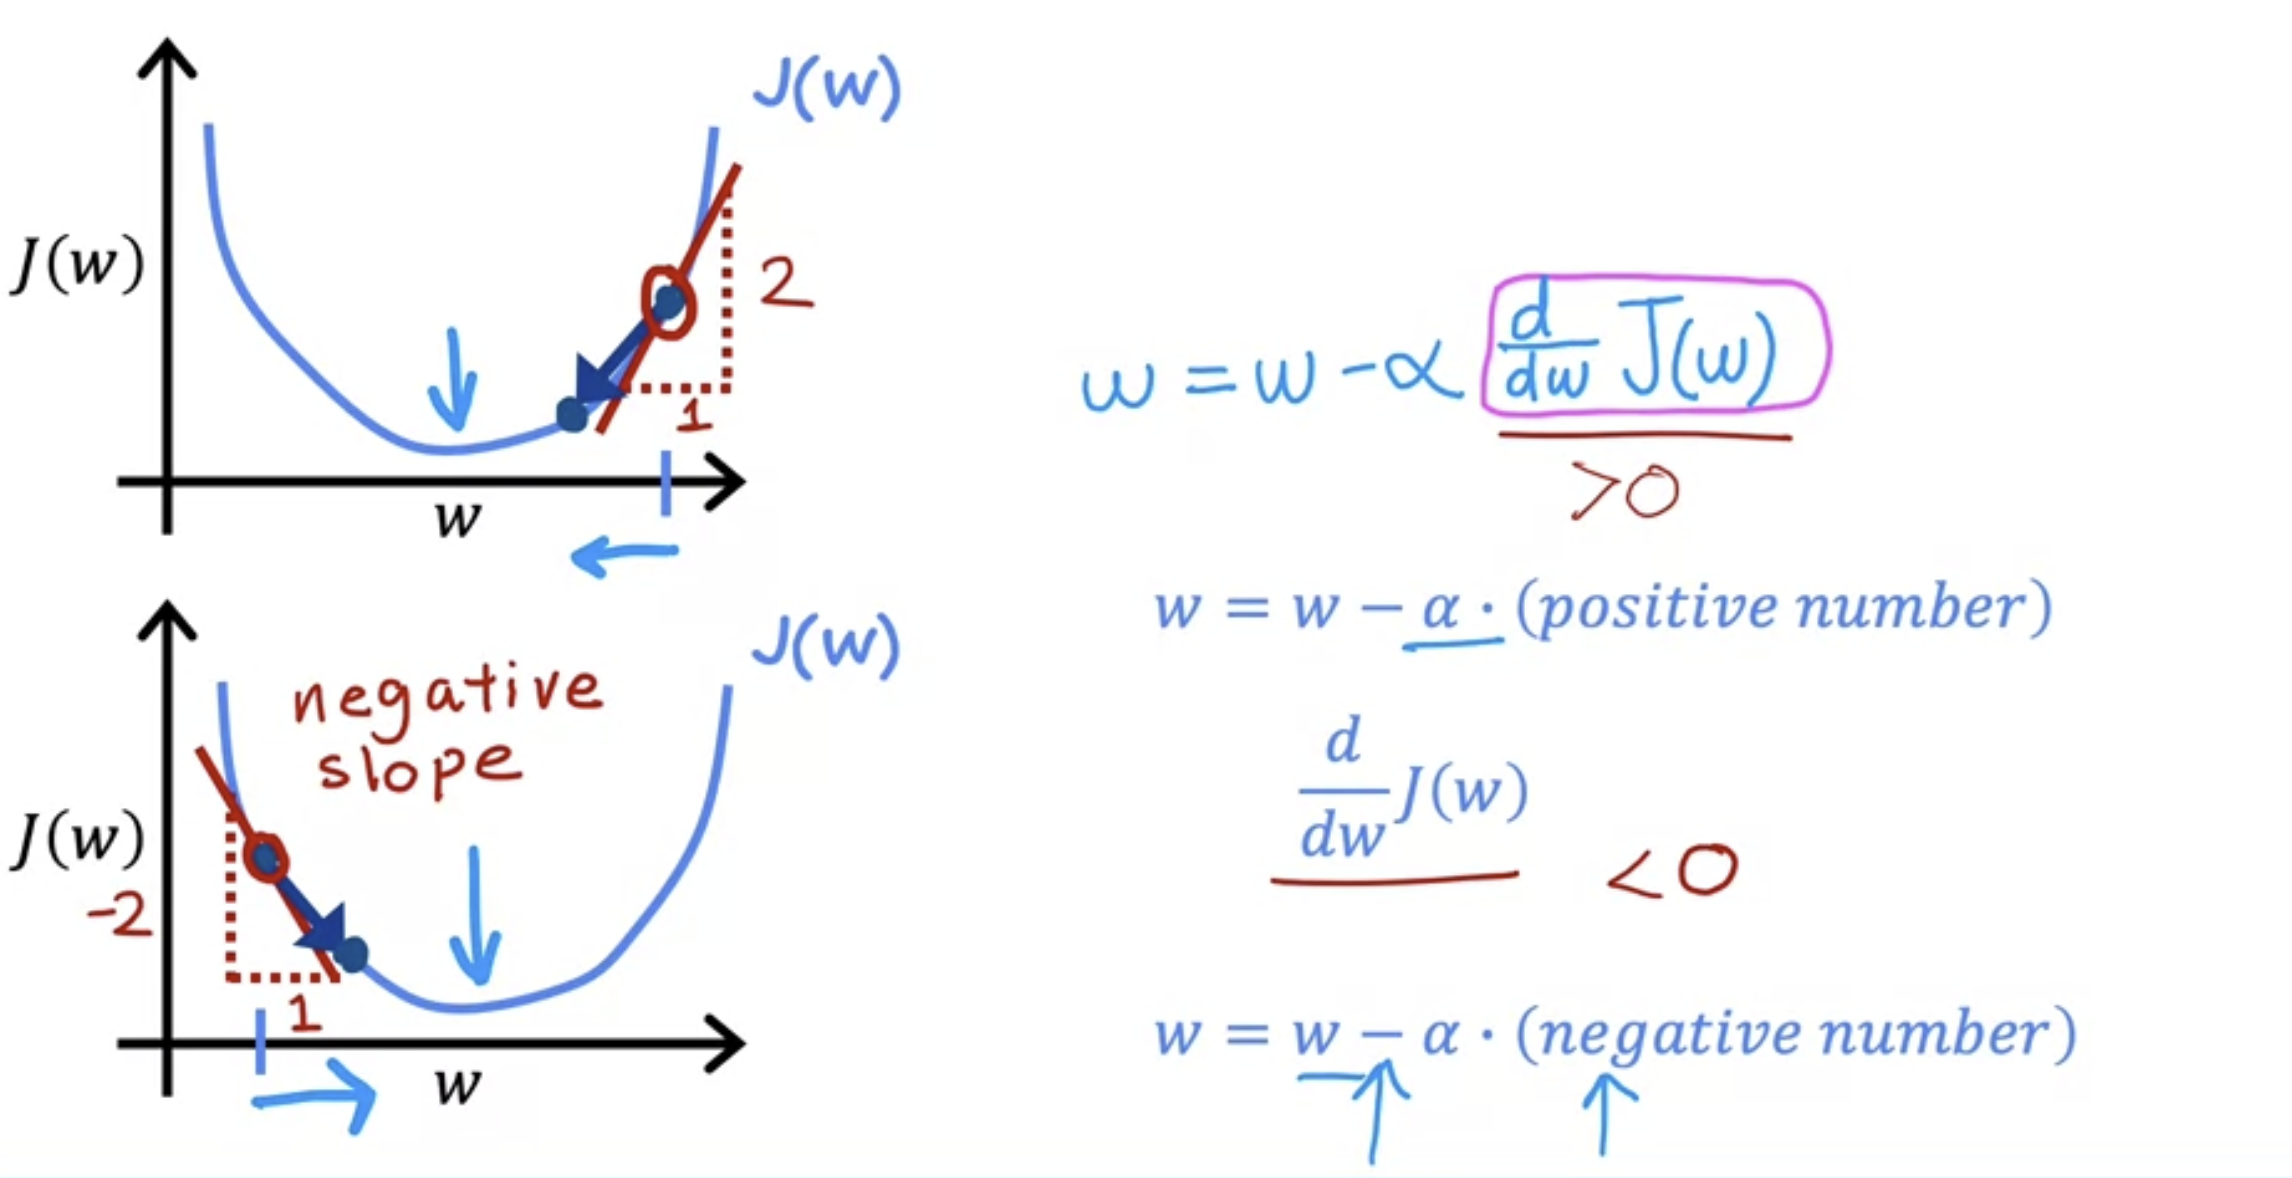


In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

### Final Linear Regression Algorithm with Gradient Descent

repeat until convergence {

$ w = w - \alpha \times \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)}) x^{(i)}   $







$ b = b - \alpha \times \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})  $




## Cost Funtion & Local Minimum

As it turns out, linear regression model with gradient descent will never have multiple local minimum. Its a bowl shaped convex function with one global minimum.

## Running Gradient Descent

In [5]:
import numpy as np

In [9]:
# x_train is the input variable (size in 1000 sq. ft)
# y_train is the target (price in 1000s of dollor)

x_train = np.array([1.0,2.0])
y_train = np.array([300.0, 500.0])

In [10]:
def compute_cost(x, y, w, b):
    m = x.shape[0]

    cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i])**2

    total_cost = 1/ (2 * m) * cost

    return total_cost

In [28]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]

        dj_dw += dj_dw_i
        dj_db += dj_db_i


    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db
        
        

In [60]:
1000%1000

0

In [70]:
def gradient_descent(x, y, w_initial, b_initial ,alpha, num_iters, cost_function, compute_gradient):
    
    cost_function_history = []   #history of avg. sum of squared error(cost function return)
    parameter_history = []   # history of paremeter w,b
    w = w_initial
    b = b_initial

    for i in range(10000):
        dj_dw, dj_db = compute_gradient(x,y, w, b)
    
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        
        avg_sum_of_squared_err = cost_function(x, y, w, b)
        cost_function_history.append(avg_sum_of_squared_err)
        parameter_history.append([w,b])

        if i% math.ceil(num_iters/10) == 0:
            print(f"b: {b}")
            print(f"w: {w}")
            print(f"err: {avg_sum_of_squared_err}")
    
    return w, b, cost_function_history, parameter_history

In [71]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 2000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x=x_train ,y=y_train, w_initial=w_init, b_initial=b_init, alpha=tmp_alpha, 
                                                    num_iters=iterations, cost_function=compute_cost, compute_gradient=compute_gradient)


b: 4.0
w: 6.5
err: 79274.8125
b: 114.64573622598198
w: 190.7118836679377
err: 11.038223294493996
b: 112.7481671541863
w: 192.12097808061574
err: 8.191983243496715
b: 111.0170490787085
w: 193.19108900655777
err: 6.118111466142633
b: 109.5209318015296
w: 194.1157405418912
err: 4.569258392878347
b: 108.2279874548482
w: 194.91482409389593
err: 3.4125109319154174
b: 107.1106251959129
w: 195.60539194766443
err: 2.548604140792952
b: 106.14500094393783
w: 196.20218055574625
err: 1.9034028596711572
b: 105.31050864876153
w: 196.71792515751508
err: 1.4215398885278132
b: 104.58934056574756
w: 197.16363154441933
err: 1.0616647150697145
b: 103.96610724536305
w: 197.5488109193384
err: 0.7928950684538176
b: 103.42750912824414
w: 197.88168286199453
err: 0.5921667930134331
b: 102.96205273771449
w: 198.1693507316228
err: 0.4422546244758681
b: 102.55980541341306
w: 198.41795324992472
err: 0.33029402387623996
b: 102.2121833521421
w: 198.63279549902947
err: 0.24667722205878423
b: 101.91176843280807
w: 198.8

In [48]:
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

(w,b) found by gradient descent: (  6.5000,  4.0000)
